In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath('C:/Users/dylan/OneDrive/Documents/Coding/LearningNumericalMethods'))
sys.path.append(os.path.dirname(SCRIPT_DIR))
from Fourier.fourierAlgos import *
from RungeKutta.rk4Algo import dsbRK4

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75

ModuleNotFoundError: No module named 'Fourier'

##### Question 1

Consider a particle oscillating in the nonharmonic potential

\begin{equation}
    V(x) = \frac{1}{p} k |x|^p, \quad p \neq 2
\end{equation}

While nonforced oscillations in this potential are always periodic, they are not sinusoidal.

<font size='-0.5'> a. For p=12, decomposed the solution x(t) into its Fourier components.

b. Determine the components that contribute at least 10%.

c. Check that resuming the components reproduces the input signal.</font>

##### Answer

Let's first remake recreat the model and apply the RK4 model to generate the signal.

In [115]:
w0 = 1

def model2(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    p = 12

    v[0] = y[1]
    v[1] = - (w0*w0)*(y[0]**(p-1))

    return v

The code below will generate the oscillation using the RK4 method, which will be fourier analyzed. Keep in mind that I generated a signal where $y(0) \simeq y(N)$, but I've zoomed in on a specific amount of time in the graphing.

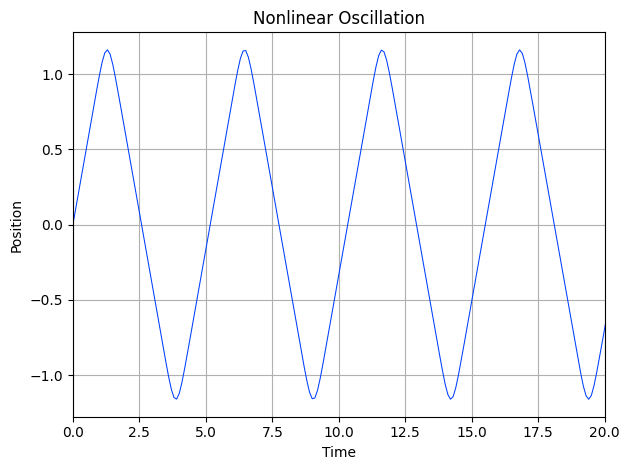

In [128]:
h = 0.1
N = 993

q, t = dsbRK4([0,w0*1], model2, 2, N, h)
x, v = q

plt.xlim(0,20)
plt.title('Nonlinear Oscillation')
plt.ylabel('Position')
plt.xlabel('Time')
plt.plot(t, x)
plt.show()

With the position function now generated, let's apply the <i>Discrete Fourier Transform</i> to decompose into the Fourier component frequencies.

In [131]:
omegas, Yn = DFT(x, len(x), h)

<i><b>How can we determine the components that contribute at least $10\%$ to the entire position function?</b></i>

To do this, we need to figure out the maximum $Y_n$ value found and divide each Fourier component by the maximum. Then, we can search for all the Fourier component ratios $ Y_n/Y_{max} > 0.1$

Omegas Contributing at least 9% : [1.2022207536395983, 3.606662260918795]
Ratios of Contribution: [(0.30282358971372636-0.953046627145223j), (-0.07263120028897097+0.05514949369846275j)]


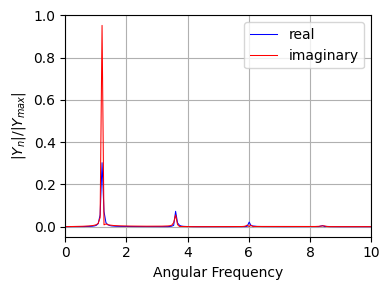

In [196]:
min_Yn = []
min_omegas = []
ratio = []

max_Yn = max(abs(Yn))

for i in range(0, len(Yn)):
    if abs(Yn[i])/max_Yn > 0.09:
        min_omegas.append(omegas[i])
        ratio.append(Yn[i]/max_Yn)

print("Omegas Contributing at least 9% : " + str(min_omegas[0:len(min_omegas)//2]))
print("Ratios of Contribution: " + str(ratio[0:len(min_omegas)//2]))

plt.figure(figsize = (4, 3))
plt.xlim(0,10)
plt.plot(omegas, abs(Yn.real)/max_Yn, 'b', label = 'real')
plt.plot(omegas, abs(Yn.imag)/max_Yn, 'r', label = 'imaginary')
plt.ylabel("$|Y_n|/|Y_{max}|$")
plt.xlabel('Angular Frequency')
plt.legend()
plt.show()

<i><b>What can we gather from the analysis above?</b></i>

Notice the peaks in Fourier components. These correspond to the angular frequencies that contribute the most to the Fourier series that generate the nonlinear oscillation.

<i><b>How can I believe that these are the frequencies that make up the most of the </b></i>

Let's use the frequencies that contribute at least 9% of the oscillation to write the first few terms of the Fourier series. Let's also compare it to the <i>inverse Discrete Fourier Transform</i>

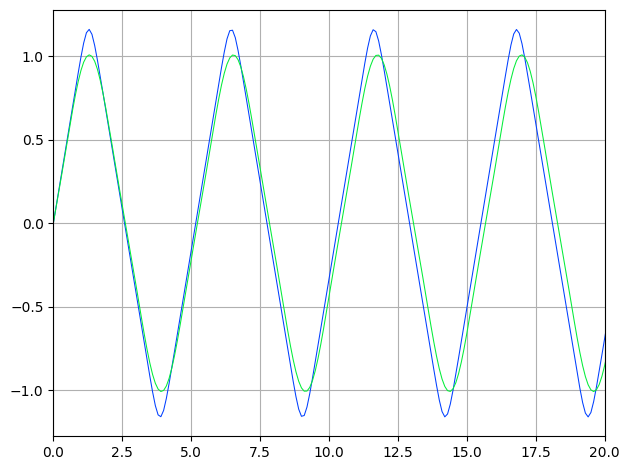

In [200]:
tmin = np.arange(0, N*h, h)
ymin = 0.953046627145223*np.sin(1.2022207536395983*tmin) - 0.05514949369846275*np.sin(3.606662260918795*tmin)

t, yk = invDFT(Yn, h)

plt.xlim(0,20)
plt.plot(t, yk)
plt.plot(tmin, ymin)
plt.show()